# Problem Set #9
MACS 30150, Dr. Evans  
Minghao Yang

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

## 1. Neural Network Horse Race (5 points)
### (a)

In [2]:
# Load the data as a dataframe
df1 = pd.read_csv('data/strongdrink.txt')
df1.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


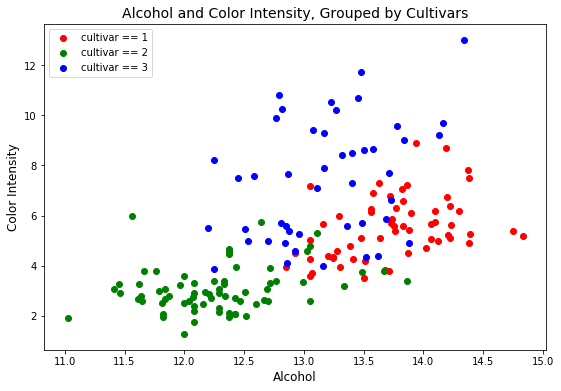

In [3]:
# Draw the scatterplot
alco = df1['alco']
color_int = df1['color_int']
plt.figure(figsize=(9, 6))
ax = plt.gca()
ax.scatter(alco[df1['cultivar'] == 1], color_int[df1['cultivar'] == 1], 
           color='r', marker='o', label='cultivar == 1')
ax.scatter(alco[df1['cultivar'] == 2], color_int[df1['cultivar'] == 2], 
           color='g', marker='o', label='cultivar == 2')
ax.scatter(alco[df1['cultivar'] == 3], color_int[df1['cultivar'] == 3], 
           color='b', marker='o', label='cultivar == 3')
ax.set_xlabel(r'Alcohol', size=12)
ax.set_ylabel(r'Color Intensity', size=12)
ax.set_title(r'Alcohol and Color Intensity, Grouped by Cultivars', size=14)
plt.legend()
plt.show()

### (b)

In [4]:
# Construct dependent and independent variable
X = df1[['alco', 'malic', 'tot_phen', 'color_int']]
y = df1['cultivar']

In [5]:
# Specify parameter distributions as suggested
param_dist_1b = {'penalty': ['l1', 'l2'],
                 'C': sp_uniform(0.1, 10.0)}

wine_multi_1b = LogisticRegression(multi_class='multinomial', random_state=25)

# Run randomized hyperparameter search
random_search_1b = RandomizedSearchCV(wine_multi_1b, param_distributions=param_dist_1b,
                                      n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                      scoring='neg_mean_squared_error')

random_search_1b.fit(X, y)
print('The optimal tuning parameter values from randomized hyperparameter search are\n',
      random_search_1b.best_params_)
print('The MSE of the optimal results is', -random_search_1b.best_score_)

The optimal tuning parameter values from randomized hyperparameter search are
 {'C': 9.565064414817147, 'penalty': 'l2'}
The MSE of the optimal results is 0.09571428571428572


### (c)

In [6]:
# Specify parameter distributions as suggested
param_dist_1c = {'n_estimators': sp_randint(10, 200),
                 'max_depth': sp_randint(2, 4),
                 'min_samples_split': sp_randint(2, 20),
                 'min_samples_leaf': sp_randint(2, 20),
                 'max_features': sp_randint(1, 4)}

wine_tree_1c = RandomForestClassifier(bootstrap=True, oob_score=True, random_state=25)

# Run randomized hyperparameter search
random_search_1c = RandomizedSearchCV(wine_tree_1c, param_distributions=param_dist_1c,
                                      n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                      scoring='neg_mean_squared_error')

random_search_1c.fit(X, y)
print('The optimal tuning parameter values from randomized hyperparameter search are\n',
      random_search_1c.best_params_)
print('The MSE of the optimal results is', -random_search_1c.best_score_)

The optimal tuning parameter values from randomized hyperparameter search are
 {'max_depth': 2, 'max_features': 1, 'min_samples_leaf': 18, 'min_samples_split': 17, 'n_estimators': 127}
The MSE of the optimal results is 0.13047619047619047


### (d)

In [7]:
# Specify parameter distributions as suggested
param_dist_1d = {'C': sp_uniform(loc=0.1, scale=10.0),
                 'gamma': ['scale', 'auto'],
                 'shrinking': [True, False]}

wine_svc_1d = SVC(kernel='rbf')

# Run randomized hyperparameter search
random_search_1d = RandomizedSearchCV(wine_svc_1d, param_distributions=param_dist_1d,
                                      n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                      scoring='neg_mean_squared_error')

random_search_1d.fit(X, y)
print('The optimal tuning parameter values from randomized hyperparameter search are\n',
      random_search_1d.best_params_)
print('The MSE of the optimal results is', -random_search_1d.best_score_)

The optimal tuning parameter values from randomized hyperparameter search are
 {'C': 8.801241366272118, 'gamma': 'scale', 'shrinking': False}
The MSE of the optimal results is 0.1461904761904762


### (e)

In [8]:
# Specify parameter distributions as suggested
param_dist_1e = {'hidden_layer_sizes': sp_randint(1, 100),
                 'activation': ['logistic', 'relu'],
                 'alpha': sp_uniform(0.1, 10.0)}

wine_nn_1e = MLPClassifier(solver='lbfgs', random_state=25)

# Run randomized hyperparameter search
random_search_1e = RandomizedSearchCV(wine_nn_1e, param_distributions=param_dist_1e,
                                      n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                      scoring='neg_mean_squared_error')

random_search_1e.fit(X, y)
print('The optimal tuning parameter values from randomized hyperparameter search are\n',
      random_search_1e.best_params_)
print('The MSE of the optimal results is', -random_search_1e.best_score_)

The optimal tuning parameter values from randomized hyperparameter search are
 {'activation': 'relu', 'alpha': 1.5925521699129908, 'hidden_layer_sizes': 15}
The MSE of the optimal results is 0.07857142857142858


### (f)

From the results above, we can see that neural network model has the smallest cross-validation MSE, so it is the best model.